In [33]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/U.S._Chronic_Disease_Indicators__CDI_.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,11,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,66,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,72,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN


# Keep only the unique questions

In [6]:
df = df[~df.duplicated("Question", keep="first")][["Topic", "Question"]].reset_index_index(drop=True)
df.head()

,Topic,Question
0,Alcohol,Amount of alcohol excise tax by beverage type ...
1,Alcohol,Amount of alcohol excise tax by beverage type ...
2,Alcohol,Amount of alcohol excise tax by beverage type ...
3,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years
4,Cardiovascular Disease,Hospitalization for heart failure among Medica...


# Breakdown of questions' topics

In [49]:
topics = df["Topic"].value_counts()
topics

Nutrition, Physical Activity, and Weight Status    37
Diabetes                                           20
Cancer                                             20
Cardiovascular Disease                             18
Chronic Obstructive Pulmonary Disease              16
Alcohol                                            16
Overarching Conditions                             16
Tobacco                                            16
Arthritis                                          10
Oral Health                                         9
Asthma                                              9
Older Adults                                        4
Chronic Kidney Disease                              4
Reproductive Health                                 3
Mental Health                                       3
Immunization                                        1
Disability                                          1
Name: Topic, dtype: int64

# Filter out categories with few entries

In [72]:
df = df[df["Topic"].str.match("|".join(topics.nlargest(11).index.to_list()))].reset_index(drop=True)
df.head()

,Topic,Question
0,Alcohol,Amount of alcohol excise tax by beverage type ...
1,Alcohol,Amount of alcohol excise tax by beverage type ...
2,Alcohol,Amount of alcohol excise tax by beverage type ...
3,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years
4,Cardiovascular Disease,Hospitalization for heart failure among Medica...


In [73]:
"|".join(["{%s}" % topic for topic in topics.nlargest(11).index.to_list()])

'{Nutrition, Physical Activity, and Weight Status}|{Diabetes}|{Cancer}|{Cardiovascular Disease}|{Chronic Obstructive Pulmonary Disease}|{Alcohol}|{Overarching Conditions}|{Tobacco}|{Arthritis}|{Oral Health}|{Asthma}'

In [74]:
nlp = spacy.load('en_core_web_lg')

In [75]:
def question_to_vec(question):
    tokens = nlp(question)
    emb_matrix = np.zeros((len(tokens), 300))
    for i, token in enumerate(tokens):
        emb_matrix[i,:] = token.vector
    return emb_matrix.mean(axis=0)
embeddings = df["Question"].apply(question_to_vec).to_list()

In [78]:
pca_2d = PCA(n_components=2)
coords = pca_2d.fit_transform(embeddings)
coords.shape

(187, 2)

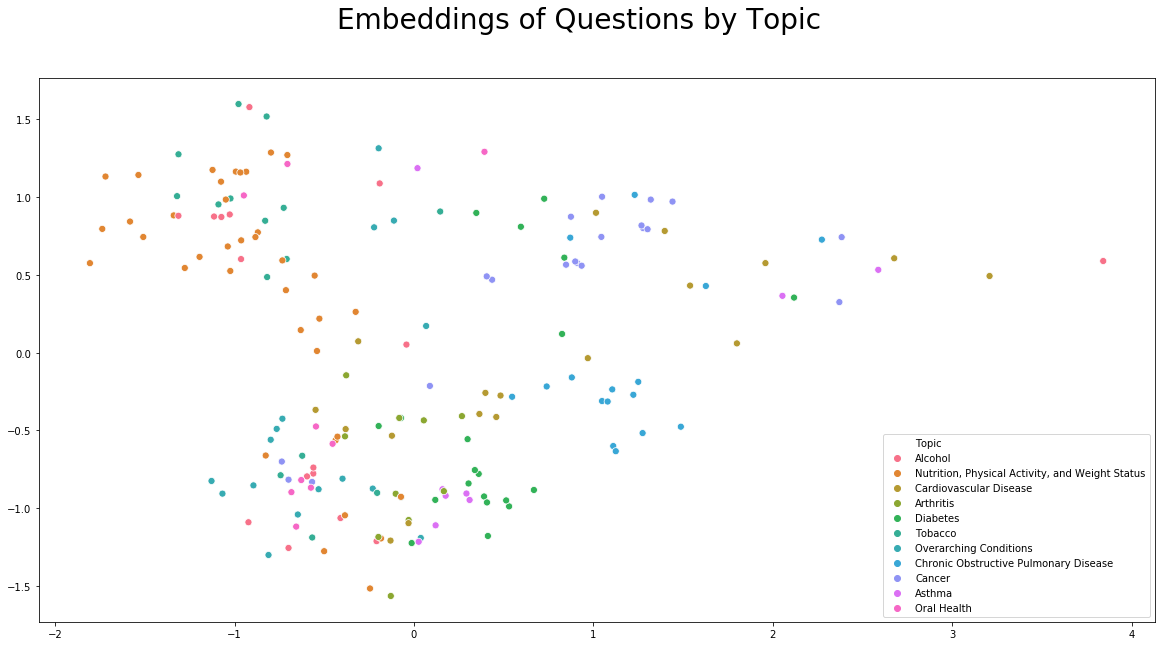

In [79]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Embeddings of Questions by Topic", fontsize=28)
sns.scatterplot(coords[:,0], coords[:,1], hue=df["Topic"], s=50)

In [80]:
pca = PCA(n_components=25)
pca.fit(embeddings)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'variance')

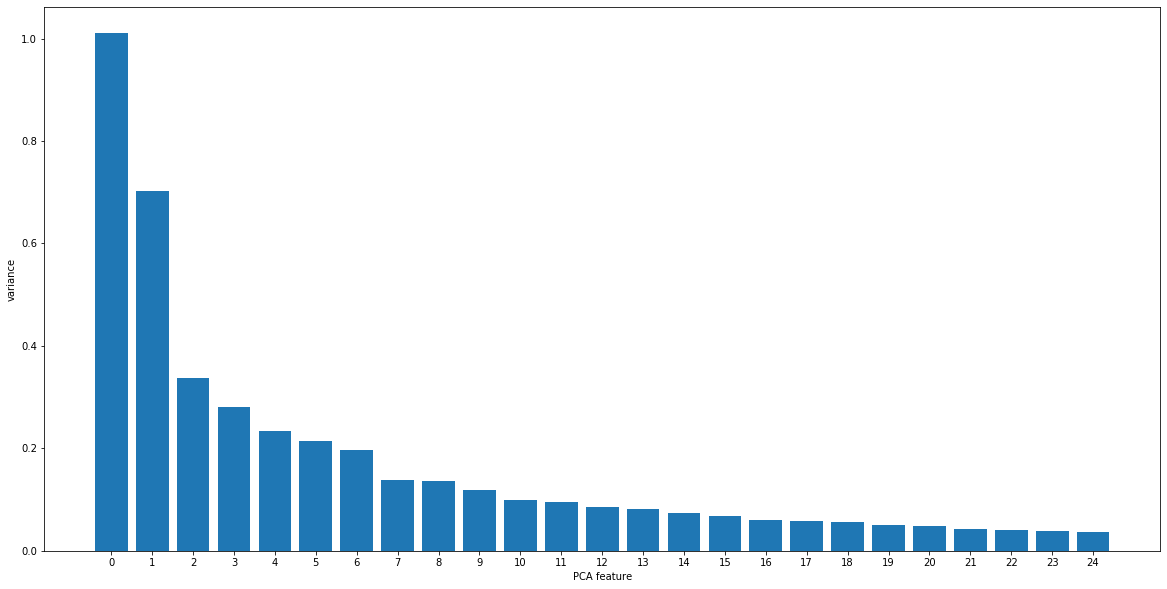

In [81]:
features = range(pca.n_components_)
plt.figure(figsize=(20, 10))
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('variance')

In [ ]:
distribution = []
for j in range(100):
    avg_params 
    params = pd.DataFrame(columns=["# of components", "Inertia", "Homogeneity Score"])
    for i in range(1, 26):
        pca = PCA(n_components=i)
        kmeans = KMeans(n_clusters=11)
        steps = [("pca", pca), ("kmeans", kmeans)]
        pipeline = Pipeline(steps)
        pipeline.fit(embeddings)
        params.loc[i-1] = [i, kmeans.inertia_, homogeneity_score(df["Topic"], pipeline.predict(embeddings))]
    distribution.append(params["Homogeneity Score"].idxmax())

In [ ]:
plt.xticks(range(5, 25))
plt.hist(distribution)